# Algoritmo para Conjunto Independiente Máximo (MIS) en Grafos Outerplanar

In [36]:
import networkx as nx
import matplotlib.pyplot as plt

## Definición del grafo outerplanar

In [37]:
G = nx.Graph()
edges = [
    (1, 2), (2, 3), (3, 4), (4, 5), (5, 1),  # ciclo externo
    (2, 5), (3, 5),  # diagonales internas
]
G.add_edges_from(edges)

## Algoritmo para encontrar el Conjunto Independiente Máximo (aproximado)

In [38]:
def mis_outerplanar(graph):
    mis = set()
    visited = set()

    def dfs(u):
        visited.add(u)
        can_add = all(v not in mis for v in graph.neighbors(u))
        if can_add:
            mis.add(u)
        for v in graph.neighbors(u):
            if v not in visited:
                dfs(v)

    for node in graph.nodes:
        if node not in visited:
            dfs(node)

    return mis

## Ejecución y visualización del resultado

Conjunto Independiente Máximo aproximado (MIS): {1, 3}


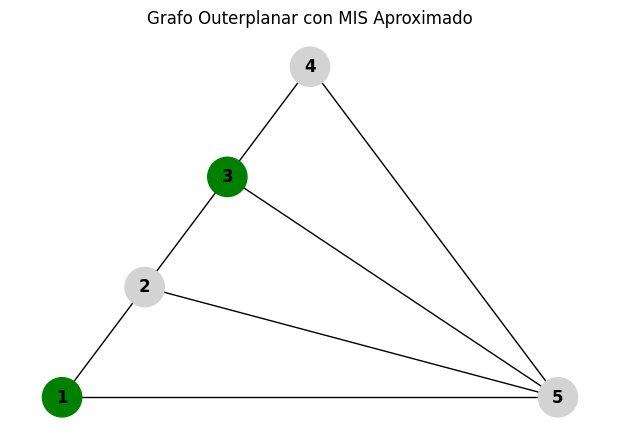

In [39]:
mis_result = mis_outerplanar(G)
print("Conjunto Independiente Máximo aproximado (MIS):", mis_result)

# Visualización del grafo y el MIS
node_colors = ['green' if node in mis_result else 'lightgray' for node in G.nodes]
pos = nx.planar_layout(G)

plt.figure(figsize=(6, 4))
nx.draw(G, pos, with_labels=True, node_color=node_colors, node_size=800,
        font_size=12, font_weight='bold', edge_color='black')
plt.title("Grafo Outerplanar con MIS Aproximado")
plt.axis('off')
plt.show()